In [18]:
#for dealing with images
import cv2

#to convert lists into arrays
import numpy as np

#for dealing with dataset to load it into the model
import os

#to build the Convlution Neural Network Model
import tensorflow as tf
from tensorflow import keras

#to visualize the results of the model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#to get the Classification Results and AUC Curve with the Confusion Matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,confusion_matrix
import seaborn as sns

EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4


In [4]:

data_dir=r"C:\Users\wifi\CS50AI Projects\traffic\gtsrb"
# a list for images
IMAGES=[]
# a list for integer labels
LABELS=[]

# for loop to go through every folder in the dataset
for folder in os.listdir(data_dir):
    folder_path=os.path.join(data_dir,folder)
    if os.path.isdir(folder_path):

        for image_file in os.listdir(folder_path):
            # read the images from the folder
            image=cv2.imread(os.path.join(folder_path,image_file),cv2.IMREAD_ANYCOLOR)
            # resize the image to the respected size
            image=cv2.resize(image,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv2.INTER_AREA)
            # append the resized image into the image list
            IMAGES.append(image)
            # append the folder into the labels list
            LABELS.append(int(folder))
            


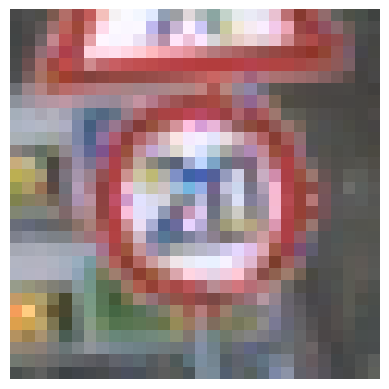

In [6]:
image = mpimg.imread(r"C:\Users\wifi\CS50AI Projects\traffic\gtsrb\0\00000_00002.ppm")

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

In [7]:
def get_model():

    model=tf.keras.models.Sequential([
        
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),

    # Max-pooling layer, using 3x3 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),

    # Add another convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    
    # Add Another Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten units
    tf.keras.layers.Flatten(),

    # Add 4 hidden layers with dropout
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.33),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.33),
    # Add an output layer with output units
    tf.keras.layers.Dense(NUM_CATEGORIES,activation="softmax")
    
    
    ])

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )
    
    return model


In [8]:


## Check command-line arguments
#if len(sys.argv) not in [2, 3]:
#    sys.exit("Usage: python traffic.py data_directory [model.h5]")

# Get image arrays and labels for all image files
images, labels = IMAGES,LABELS

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

# Get a compiled neural network
model = get_model()

# Fit model on training data
fitting=model.fit(x_train, y_train, epochs=EPOCHS,validation_data=(x_test,y_test))

# Evaluate neural network performance
model_evaluation=model.evaluate(x_test,  y_test, verbose=2)
#print("Evaluation result",model_evaluation)

# Save model to file
"""filename = "trained model.h5"
model.save(filename)
print(f"Model saved to {filename}.")"""

Epoch 1/10
500/500 [==============================] - 17s 21ms/step - loss: 2.6498 - accuracy: 0.3291 - val_loss: 1.2902 - val_accuracy: 0.6164
Epoch 2/10
500/500 [==============================] - 10s 21ms/step - loss: 1.0617 - accuracy: 0.6844 - val_loss: 0.5781 - val_accuracy: 0.8285
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 0.6222 - accuracy: 0.8144 - val_loss: 0.3787 - val_accuracy: 0.8857
Epoch 4/10
500/500 [==============================] - 10s 20ms/step - loss: 0.4384 - accuracy: 0.8741 - val_loss: 0.3300 - val_accuracy: 0.9076
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 0.3497 - accuracy: 0.8998 - val_loss: 0.5653 - val_accuracy: 0.8587
Epoch 6/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2845 - accuracy: 0.9208 - val_loss: 0.2594 - val_accuracy: 0.9224
Epoch 7/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2452 - accuracy: 0.9290 - val_loss: 0.1935 - val_accuracy:

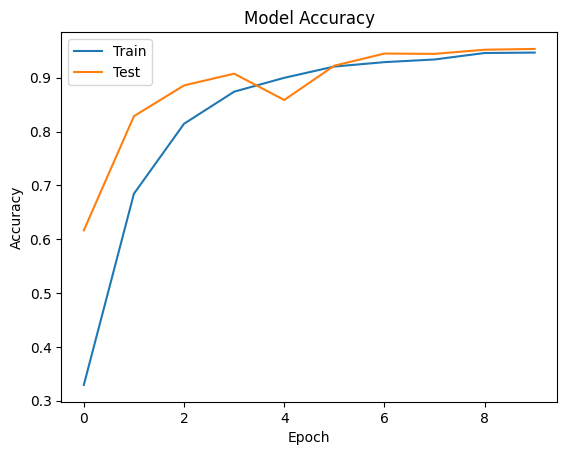

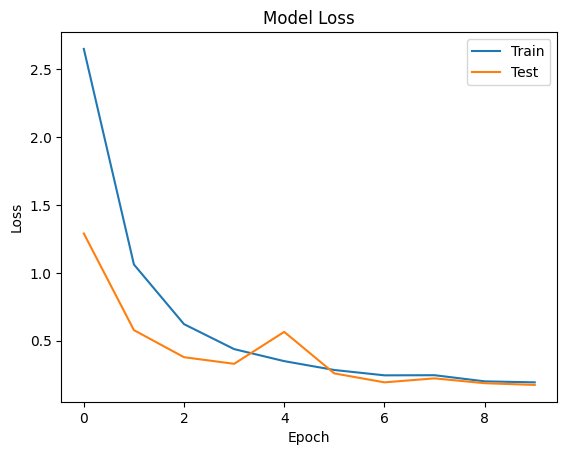

In [9]:
def view(history):
    # Plot the training accuracy and loss over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

view(fitting)

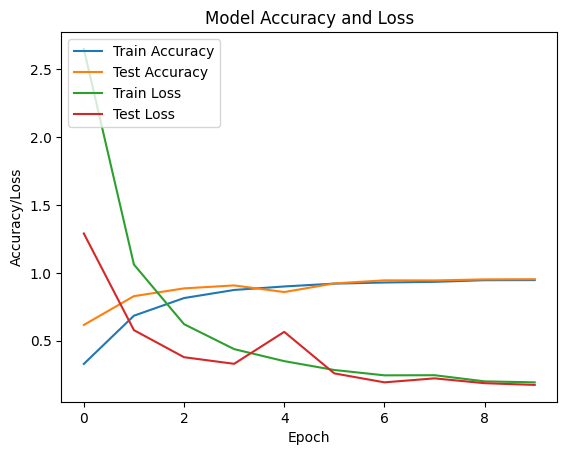

In [10]:
def way2(history):
    # Plot the training and testing accuracy and loss over epochs
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'], loc='upper left')
    plt.show()

way2(fitting)

333/333 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        59
           1       0.90      0.98      0.94       573
           2       0.96      0.90      0.93       606
           3       0.89      0.93      0.91       372
           4       0.99      0.93      0.96       545
           5       0.88      0.90      0.89       497
           6       0.98      0.98      0.98       112
           7       0.93      0.93      0.93       391
           8       0.94      0.94      0.94       406
           9       0.96      0.99      0.97       405
          10       0.99      0.97      0.98       529
          11       0.94      0.98      0.96       363
          12       0.99      0.99      0.99       546
          13       0.99      1.00      1.00       553
          14       0.99      0.99      0.99       224
          15       0.89      1.00      0.94       152
          16       0.98   

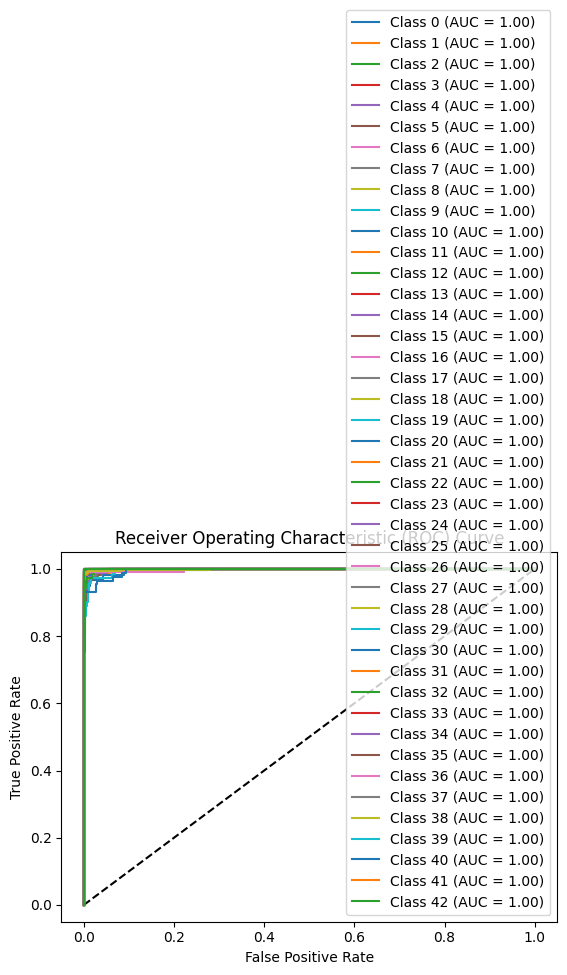

In [11]:
y_pred_proba = model.predict(x_test)
y_true = np.argmax(y_test, axis=1)
classification_rep = classification_report(y_true, np.argmax(y_pred_proba, axis=1))
print(classification_rep)
auc_scores = []
for class_index in range(NUM_CATEGORIES):  # num_classes is the number of classes in your problem
    class_true = np.where(y_true == class_index, 1, 0)
    class_pred = y_pred_proba[:, class_index]
    auc_scores.append(roc_auc_score(class_true, class_pred))

# Print AUC scores for each class
for class_index, auc_score in enumerate(auc_scores):
    print("AUC Score (Class {}): {}".format(class_index, auc_score))

# Step 5: Plot ROC curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')

for class_index in range(NUM_CATEGORIES):
    class_true = np.where(y_true == class_index, 1, 0)
    class_pred = y_pred_proba[:, class_index]
    fpr, tpr, _ = roc_curve(class_true, class_pred)
    auc_score = auc_scores[class_index]
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_index, auc_score))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


333/333 [==============================] - 3s 10ms/step


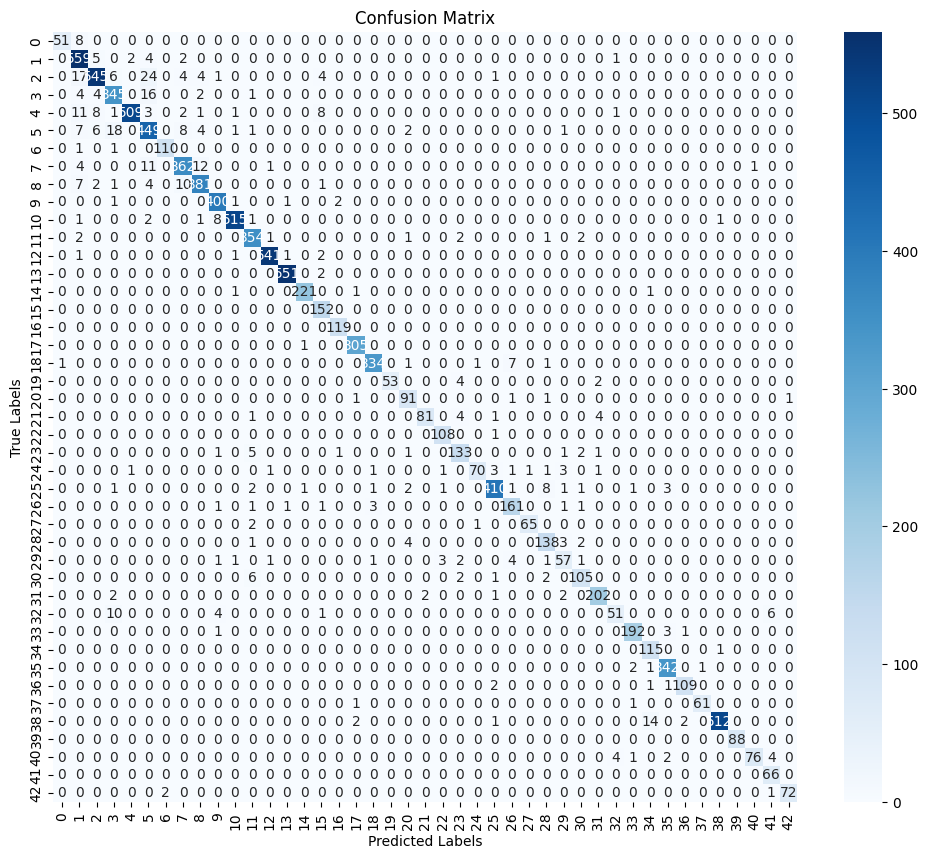

In [19]:
# Assuming you have the predicted labels in 'y_pred' and true labels in 'y_true'
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert y_true to one-hot encoding if it's not already in that format
y_true_labels = np.argmax(keras.utils.to_categorical(y_true), axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
